In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
import pandas as pd

# 1) Read raw CSVs
housing_df = pd.read_csv('data/housing.csv')
loan_df    = pd.read_csv('data/loan_data.csv')

# 2) Subset only the features we need
housing_relevant = housing_df[[
    'longitude',
    'latitude',
    'median_income',
    'median_house_value',
    'ocean_proximity'
]]

loan_relevant = loan_df[[
    'person_income',
    'credit_score',
    'loan_status',
    'person_education'
]]

# 3) Quick peek & info
display(housing_relevant.head())
display(loan_relevant.head())

print("Housing data info:")
housing_relevant.info()

print("\nLoan data info:")
loan_relevant.info()

,longitude,latitude,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,3.8462,342200.0,NEAR BAY


,person_income,credit_score,loan_status,person_education
0,71948.0,561,1,Master
1,12282.0,504,0,High School
2,12438.0,635,1,High School
3,79753.0,675,1,Bachelor
4,66135.0,586,1,Master


Housing data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   median_income       20640 non-null  float64
 3   median_house_value  20640 non-null  float64
 4   ocean_proximity     20640 non-null  object 
dtypes: float64(4), object(1)
memory usage: 806.4+ KB

Loan data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   person_income     45000 non-null  float64
 1   credit_score      45000 non-null  int64  
 2   loan_status       45000 non-null  int64  
 3   person_education  45000 non-null  object 
dtypes: float64(1), int64(2), object(1)
memory usage: 1.4+ MB


In [99]:

# --- 1. EXTRACT & LOAD ---
housing = pd.read_csv('data/housing.csv')
loan = pd.read_csv('data/loan_data.csv')

# --- 2. TRANSFORM: Housing Data ---
housing_clean = housing[['longitude', 'latitude', 'median_income', 'median_house_value', 'ocean_proximity']].copy()

# Handle missing values (drop or impute as appropriate)
housing_clean.dropna(inplace=True)

# Encode 'ocean_proximity' as category codes
housing_clean['ocean_proximity_cat'] = housing_clean['ocean_proximity'].astype('category').cat.codes

# (Optional) Check for outliers in income/house value
for col in ['median_income', 'median_house_value']:
    q_low  = housing_clean[col].quantile(0.01)
    q_high = housing_clean[col].quantile(0.99)
    housing_clean = housing_clean[(housing_clean[col] >= q_low) & (housing_clean[col] <= q_high)]

# --- 3. TRANSFORM: Loan Data ---
loan_clean = loan[['person_income', 'credit_score', 'loan_status', 'person_education']].copy()
loan_clean.dropna(inplace=True)

# Encode 'person_education' as category codes
loan_clean['education_cat'] = loan_clean['person_education'].astype('category').cat.codes

# (Optional) Outlier filter on income and credit_score
for col in ['person_income', 'credit_score']:
    q_low  = loan_clean[col].quantile(0.01)
    q_high = loan_clean[col].quantile(0.99)
    loan_clean = loan_clean[(loan_clean[col] >= q_low) & (loan_clean[col] <= q_high)]

# --- 4. Data Structures Ready ---
print("Housing Cleaned:")
display(housing_clean.head())

print("Loan Cleaned:")
display(loan_clean.head())

Housing Cleaned:


,longitude,latitude,median_income,median_house_value,ocean_proximity,ocean_proximity_cat
0,-122.23,37.88,8.3252,452600.0,NEAR BAY,3
1,-122.22,37.86,8.3014,358500.0,NEAR BAY,3
2,-122.24,37.85,7.2574,352100.0,NEAR BAY,3
3,-122.25,37.85,5.6431,341300.0,NEAR BAY,3
4,-122.25,37.85,3.8462,342200.0,NEAR BAY,3


Loan Cleaned:


,person_income,credit_score,loan_status,person_education,education_cat
0,71948.0,561,1,Master,4
3,79753.0,675,1,Bachelor,1
4,66135.0,586,1,Master,4
6,93471.0,701,1,Bachelor,1
7,95550.0,585,1,High School,3


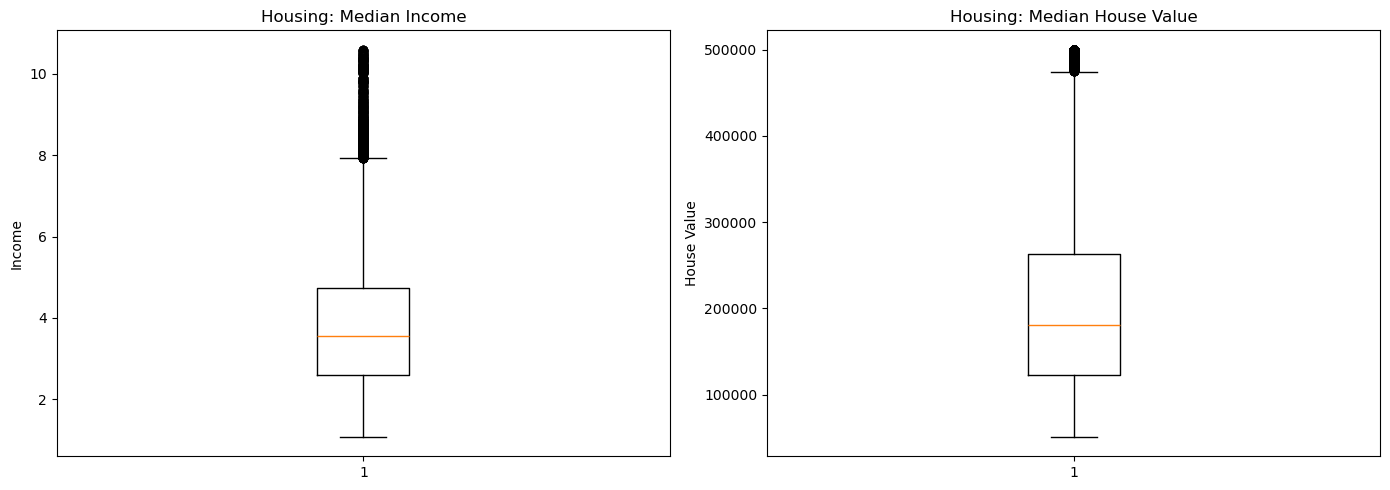

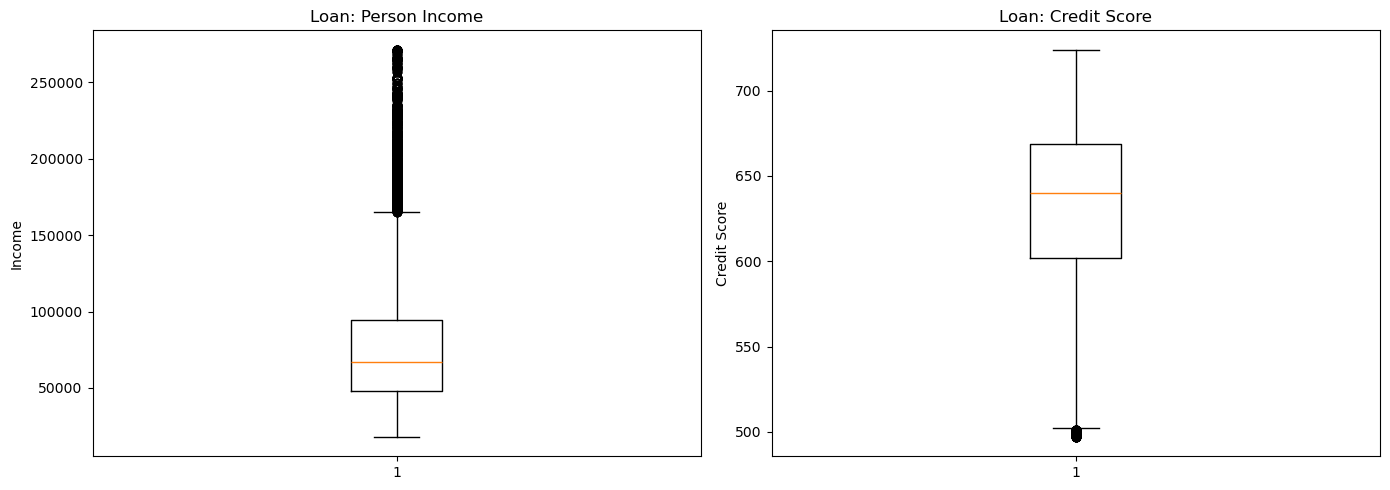

In [100]:

# --- Boxplots for outliers in housing data ---
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.boxplot(housing_clean['median_income'])
plt.title('Housing: Median Income')
plt.ylabel('Income')

plt.subplot(1, 2, 2)
plt.boxplot(housing_clean['median_house_value'])
plt.title('Housing: Median House Value')
plt.ylabel('House Value')

plt.tight_layout()
plt.show()

# --- Boxplots for outliers in loan data ---
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.boxplot(loan_clean['person_income'])
plt.title('Loan: Person Income')
plt.ylabel('Income')

plt.subplot(1, 2, 2)
plt.boxplot(loan_clean['credit_score'])
plt.title('Loan: Credit Score')
plt.ylabel('Credit Score')

plt.tight_layout()
plt.show()

In [101]:
print("Housing Data Descriptive Statistics:")
display(housing_clean.describe())

# For categorical feature
print("\nOcean Proximity Value Counts:")
display(housing_clean['ocean_proximity'].value_counts())

# --- LOAN DATA ---
print("\nLoan Data Descriptive Statistics:")
display(loan_clean.describe())

print("\nEducation Level Counts:")
display(loan_clean['person_education'].value_counts())

Housing Data Descriptive Statistics:


,longitude,latitude,median_income,median_house_value,ocean_proximity_cat
count,20024.000000,20024.000000,20024.000000,20024.000000,20024.000000
mean,-119.568215,35.621945,3.831628,206372.606522,1.163753
std,2.003010,2.135971,1.661078,111570.362695,1.424384
min,-124.350000,32.540000,1.071400,50800.000000,0.000000
25%,-121.800000,33.930000,2.601600,122200.000000,0.000000
50%,-118.480000,34.250000,3.552150,180800.000000,1.000000
75%,-118.000000,37.710000,4.728900,263225.000000,1.000000
max,-114.310000,41.950000,10.594100,500001.000000,4.000000



Ocean Proximity Value Counts:


ocean_proximity
<1H OCEAN     8944
INLAND        6262
NEAR OCEAN    2592
NEAR BAY      2221
ISLAND           5
Name: count, dtype: int64


Loan Data Descriptive Statistics:


,person_income,credit_score,loan_status,education_cat
count,43262.000000,43262.000000,43262.000000,43262.000000
mean,76714.571795,633.204544,0.216911,1.737807
std,41031.165045,47.364164,0.412146,1.478328
min,17876.000000,497.000000,0.000000,0.000000
25%,47758.000000,602.000000,0.000000,0.000000
50%,67051.000000,640.000000,0.000000,1.000000
75%,94673.500000,669.000000,0.000000,3.000000
max,271448.000000,724.000000,1.000000,4.000000



Education Level Counts:


person_education
Bachelor       12950
Associate      11609
High School    11517
Master          6654
Doctorate        532
Name: count, dtype: int64

- **Housing Data:**  
  - The median house value ranges from \$50,800 to \$500,001, with a mean around \$206,373.
  - Median income varies from about 1.07 to 10.59 (likely in tens of thousands), with a mean of 3.83.
  - The geographical spread covers a wide range of latitudes and longitudes, representing different regions of California.
  - The `ocean_proximity_cat` shows that the majority of houses are either within one hour of the ocean or are inland.
  - The value counts for `ocean_proximity` indicate that most homes are "<1H OCEAN" (close to the ocean) or "INLAND", while "ISLAND" homes are extremely rare.

- **Loan Data:**  
  - Applicant incomes range from about \$17,876 to \$271,448, with a mean of about \$76,715.
  - Credit scores are centered around 633, ranging from 497 to 724.
  - The `loan_status` mean (0.217) suggests about 22% of loan applications are approved.
  - The `education_cat` variable and value counts for `person_education` show that most applicants have either a Bachelor’s, Associate’s, or High School degree, with relatively fewer holding a Master’s or Doctorate.

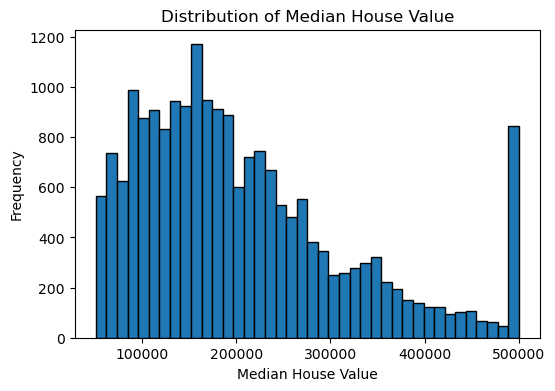

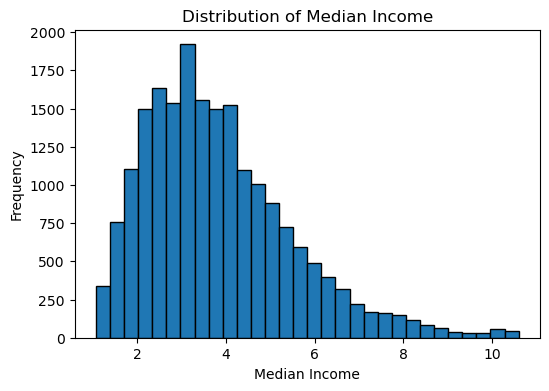

<Figure size 800x500 with 0 Axes>

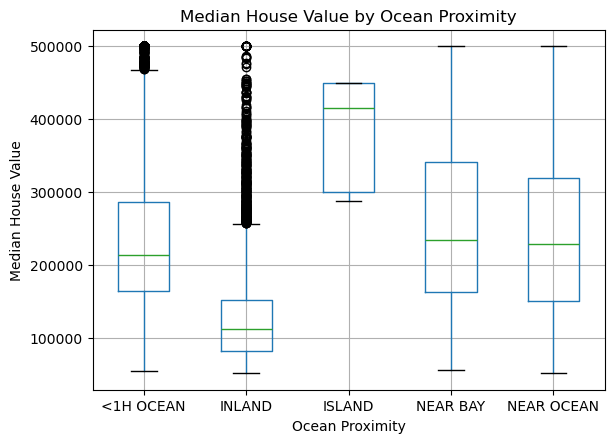

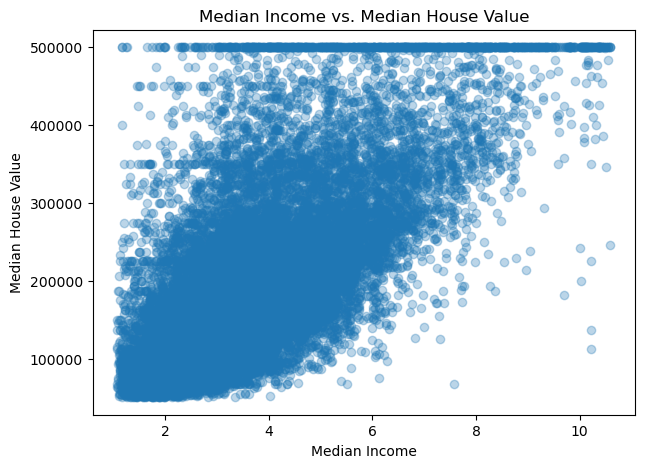

In [103]:
# Histogram of Median House Value
plt.figure(figsize=(6, 4))
plt.hist(housing_clean['median_house_value'], bins=40, edgecolor='black')
plt.title('Distribution of Median House Value')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.show()

# Income Distribution
plt.figure(figsize=(6, 4))
plt.hist(housing_clean['median_income'], bins=30, edgecolor='black')
plt.title('Distribution of Median Income')
plt.xlabel('Median Income')
plt.ylabel('Frequency')
plt.show()

# Boxplot of House Value by Ocean Proximity
plt.figure(figsize=(8, 5))
housing_clean.boxplot(column='median_house_value', by='ocean_proximity')
plt.title('Median House Value by Ocean Proximity')
plt.suptitle('')
plt.xlabel('Ocean Proximity')
plt.ylabel('Median House Value')
plt.show()

# Scatter: Income vs. House Value
plt.figure(figsize=(7, 5))
plt.scatter(housing_clean['median_income'], housing_clean['median_house_value'], alpha=0.3)
plt.title('Median Income vs. Median House Value')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()

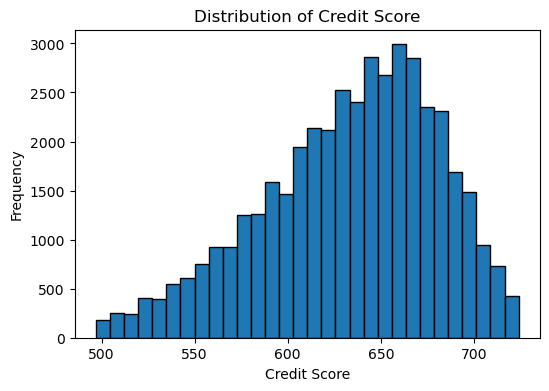

<Figure size 600x400 with 0 Axes>

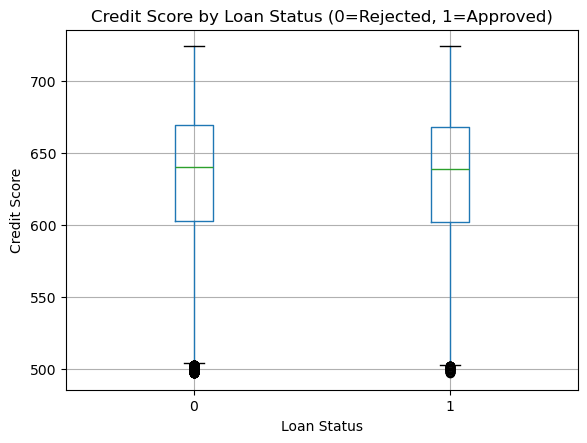

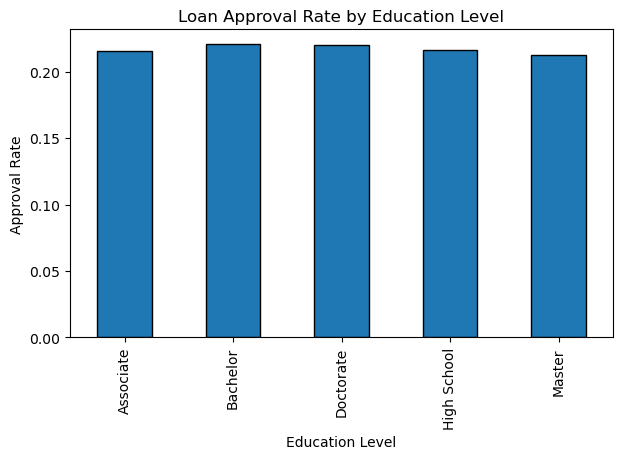

In [104]:
# Credit Score Distribution
plt.figure(figsize=(6, 4))
plt.hist(loan_clean['credit_score'], bins=30, edgecolor='black')
plt.title('Distribution of Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.show()

# Boxplot of Credit Score by Loan Status
plt.figure(figsize=(6, 4))
loan_clean.boxplot(column='credit_score', by='loan_status')
plt.title('Credit Score by Loan Status (0=Rejected, 1=Approved)')
plt.suptitle('')
plt.xlabel('Loan Status')
plt.ylabel('Credit Score')
plt.show()

# Approval Rate by Education Level
education_approval = loan_clean.groupby('person_education')['loan_status'].mean()
education_approval.plot(kind='bar', figsize=(7, 4), edgecolor='black')
plt.title('Loan Approval Rate by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Approval Rate')
plt.show()

**Visualizing Housing Data Distributions**

- The **histogram of median house value** reveals a right-skewed distribution, with most properties valued below \$300,000, but with a long tail up to the maximum.
- The **income distribution histogram** is also right-skewed, showing that the majority of neighborhoods have a median income on the lower end, with fewer areas having very high median incomes.
- The **boxplot of house value by ocean proximity** shows that houses near the ocean ("<1H OCEAN", "NEAR OCEAN", "NEAR BAY") tend to have higher median values compared to those "INLAND." The "ISLAND" category has very few samples and may not be representative.
- The **scatterplot of median income versus house value** indicates a strong positive association: neighborhoods with higher median income generally also have higher median house values. However, there is also notable spread, suggesting other factors play a role.

These visualizations confirm that both location (especially proximity to the ocean) and neighborhood income are important factors influencing California housing prices, and that the market contains a wide variety of price and income levels.


In [106]:
# Correlation in housing data (numeric)
print("Housing Data Correlations:")
display(housing_clean.corr(numeric_only=True))

# Correlation in loan data (numeric)
print("\nLoan Data Correlations:")
display(loan_clean.corr(numeric_only=True))

Housing Data Correlations:


,longitude,latitude,median_income,median_house_value,ocean_proximity_cat
longitude,1.000000,-0.926739,-0.014170,-0.046350,-0.288352
latitude,-0.926739,1.000000,-0.077713,-0.140877,0.200638
median_income,-0.014170,-0.077713,1.000000,0.669849,-0.021495
median_house_value,-0.046350,-0.140877,0.669849,1.000000,0.083071
ocean_proximity_cat,-0.288352,0.200638,-0.021495,0.083071,1.000000



Loan Data Correlations:


,person_income,credit_score,loan_status,education_cat
person_income,1.000000,0.017951,-0.221079,0.003940
credit_score,0.017951,1.000000,-0.006985,0.006057
loan_status,-0.221079,-0.006985,1.000000,-0.003209
education_cat,0.003940,0.006057,-0.003209,1.000000


**Correlation Analysis**

- **Housing Data:**
  - The strongest correlation is between **median income and median house value** (0.67), confirming that higher-income neighborhoods tend to have higher house prices.
  - **Latitude and longitude** are highly (negatively) correlated (-0.93), reflecting California’s geography.
  - **Ocean proximity (encoded as a category)** shows a weak positive correlation (0.08) with house value, indicating a slight association between being closer to the ocean and higher prices, but not as strong as income.
  - Most other correlations are weak or close to zero, suggesting little linear relationship between those features.

- **Loan Data:**
  - **Person income** is weakly negatively correlated with **loan approval** (-0.22), meaning higher income applicants are slightly less likely to be approved, though the correlation is weak and may be influenced by other factors.
  - **Credit score** shows almost no correlation with loan approval in this dataset (-0.007), which is somewhat surprising and suggests other factors are at play in the loan approval process.
  - **Education level** is also not strongly correlated with any other variable.

**Conclusion:**  
Income is a key predictor for house prices, but neither income, credit score, nor education show strong linear relationships with loan approval in this dataset. This supports earlier findings from your descriptive and visual analyses.


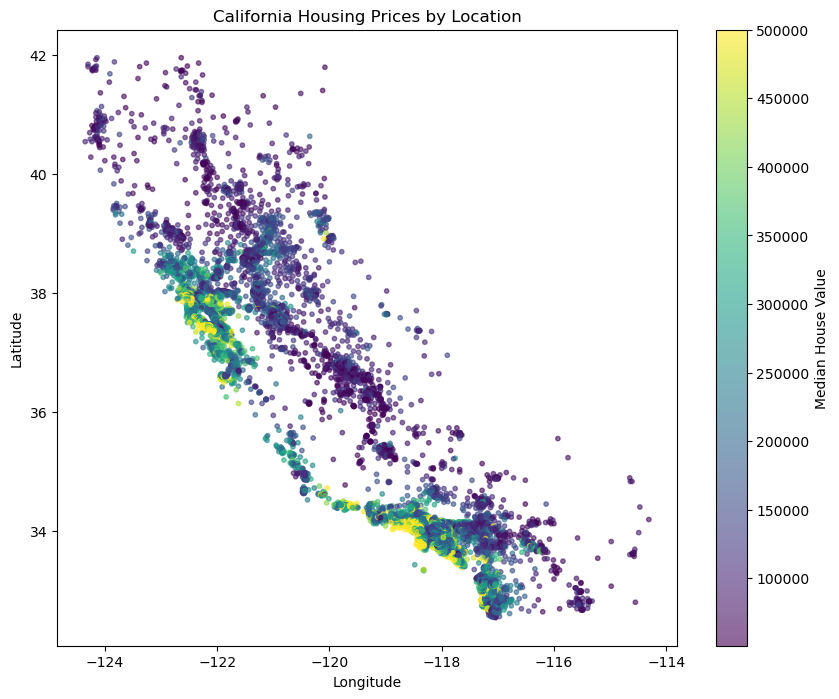

In [108]:

plt.figure(figsize=(10, 8))
sc = plt.scatter(
    housing_clean['longitude'],
    housing_clean['latitude'],
    c=housing_clean['median_house_value'],
    cmap='viridis',
    alpha=0.6,
    s=10
)
plt.colorbar(sc, label='Median House Value')
plt.title('California Housing Prices by Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

**Geographic Distribution of Housing Prices**

This scatterplot maps California housing prices geographically, with each point representing a neighborhood and color indicating the median house value.

- **Interpretation:**  
  - The plot reveals clear geographic patterns in housing prices.
  - The most expensive homes (darker colors) tend to cluster along the coast and around major urban areas (such as the Bay Area and Los Angeles).
  - Inland and northern regions generally have lower median house values.
  - This visualization highlights the strong influence of geographic location—especially coastal proximity—on California’s housing market.

Overall, the map provides visual evidence that both **location** and **proximity to the coast** are key determinants of house prices in California.


In [110]:
# Housing: Unique value counts
print(housing_clean.nunique())
print(housing_clean['ocean_proximity'].value_counts())

# Loan: Unique value counts
print(loan_clean.nunique())
print(loan_clean['person_education'].value_counts())


longitude                830
latitude                 850
median_income          12502
median_house_value      3736
ocean_proximity            5
ocean_proximity_cat        5
dtype: int64
ocean_proximity
<1H OCEAN     8944
INLAND        6262
NEAR OCEAN    2592
NEAR BAY      2221
ISLAND           5
Name: count, dtype: int64
person_income       32642
credit_score          228
loan_status             2
person_education        5
education_cat           5
dtype: int64
person_education
Bachelor       12950
Associate      11609
High School    11517
Master          6654
Doctorate        532
Name: count, dtype: int64


In [111]:
# Housing: 'ocean_proximity_cat' already encoded
# Loan: 'education_cat' already encoded

# Keep only numerical/categorical codes for modeling
housing_model = housing_clean[['longitude', 'latitude', 'median_income', 'ocean_proximity_cat', 'median_house_value']]
loan_model = loan_clean[['person_income', 'credit_score', 'education_cat', 'loan_status']]


In [112]:
print("Any nulls in housing:", housing_model.isnull().sum().sum())
print("Any nulls in loan:", loan_model.isnull().sum().sum())


Any nulls in housing: 0
Any nulls in loan: 0


In [113]:
from sklearn.preprocessing import StandardScaler

# For Housing
scaler_h = StandardScaler()
housing_scaled = housing_model.copy()
housing_scaled[['longitude', 'latitude', 'median_income', 'median_house_value']] = scaler_h.fit_transform(
    housing_model[['longitude', 'latitude', 'median_income', 'median_house_value']]
)

# For Loan
scaler_l = StandardScaler()
loan_scaled = loan_model.copy()
loan_scaled[['person_income', 'credit_score']] = scaler_l.fit_transform(
    loan_model[['person_income', 'credit_score']]
)

# Preview scaled data
display(housing_scaled.head())
display(loan_scaled.head())


,longitude,latitude,median_income,ocean_proximity_cat,median_house_value
0,-1.328926,1.057183,2.705282,3,2.206980
1,-1.323933,1.047819,2.690954,3,1.363545
2,-1.333918,1.043137,2.062431,3,1.306181
3,-1.338911,1.043137,1.090567,3,1.209378
4,-1.338911,1.043137,0.008773,3,1.217445


,person_income,credit_score,education_cat,loan_status
0,-0.116171,-1.524473,4,1
3,0.074053,0.882438,1,1
4,-0.257845,-0.996641,4,1
6,0.408388,1.431383,1,1
7,0.459057,-1.017755,3,1


- **Results:**  
  - The first rows of the scaled datasets show that values for features like longitude, latitude, median income, and median house value are now centered around 0 and on a comparable scale.
  - For the loan data, person income and credit score have also been scaled, while categorical features remain unchanged.

**Conclusion:**  
Standardization ensures that no single feature dominates due to its scale, supporting more reliable and interpretable modeling results in subsequent steps.

In [115]:
# Housing: Correlations
corr_housing = housing_scaled.corr()
display(corr_housing['median_house_value'].sort_values(ascending=False))

# Loan: Correlations
corr_loan = loan_scaled.corr()
display(corr_loan['loan_status'].sort_values(ascending=False))


median_house_value     1.000000
median_income          0.669849
ocean_proximity_cat    0.083071
longitude             -0.046350
latitude              -0.140877
Name: median_house_value, dtype: float64

loan_status      1.000000
education_cat   -0.003209
credit_score    -0.006985
person_income   -0.221079
Name: loan_status, dtype: float64

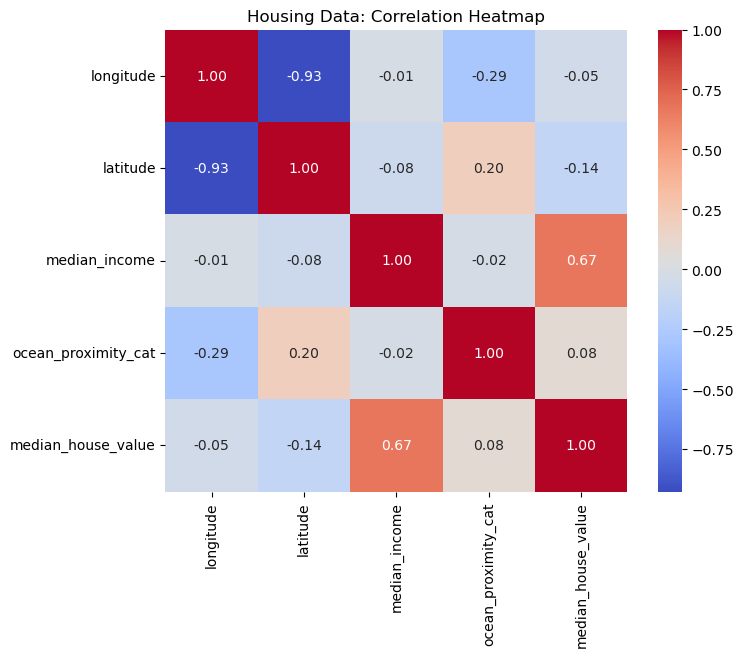

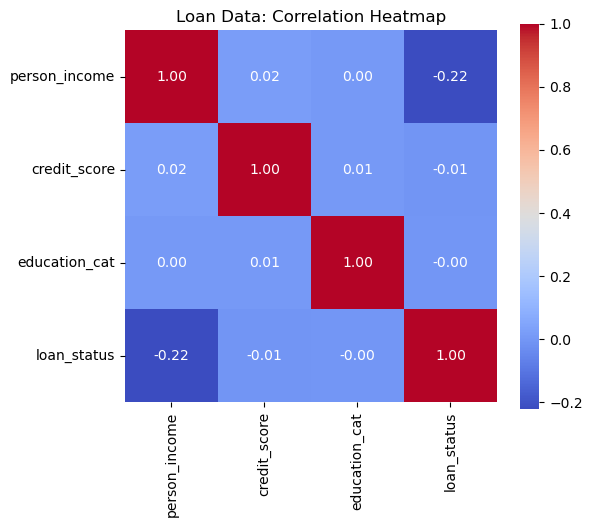

In [116]:
# Housing Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(housing_scaled.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Housing Data: Correlation Heatmap")
plt.show()

# Loan Correlation Heatmap
plt.figure(figsize=(6,5))
sns.heatmap(loan_scaled.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Loan Data: Correlation Heatmap")
plt.show()

The heatmaps provide a visual summary of how numerical features relate to each other in both the housing and loan datasets:

- **Housing Data:**  
  - The heatmap highlights a strong positive correlation between `median_income` and `median_house_value`, shown by a bright cell.  
    *This visually reinforces Hypothesis 1 (H1), supporting that higher average income is associated with higher house prices.*
  - The relationship between `ocean_proximity_cat` and house value appears as a much lighter cell, indicating a weaker association (also linked to H1).
  - Most other pairwise correlations are weak, shown by the cooler colors closer to zero, suggesting low linear relationships between most other features.

- **Loan Data:**  
  - The heatmap confirms that no single feature (such as `credit_score` or `education_cat`) shows a strong correlation with `loan_status`.  
    *This visual evidence further supports the conclusion that Hypotheses 2 and 5 (H2: credit score affects approval; H5: education level matters) are not supported by this dataset.*

**Conclusion:**  
Correlation heatmaps help confirm key findings from previous analyses—particularly, the strong link between income and house prices (supporting H1), and the lack of clear predictors for loan approval (not supporting H2 and H5).

### DATAMODELING

In [119]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Features and target
X = housing_scaled.drop('median_house_value', axis=1)
y = housing_scaled['median_house_value']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

# Evaluation
print("R2 score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R2 score: 0.5636519557970354
MSE: 0.44847881317156807


**Linear Regression for House Price Prediction (H1)**

- The linear regression model achieved an **R² score of 0.56**, meaning it explains about 56% of the variance in median house prices using the available features.
- The **mean squared error (MSE)** is 0.45, which provides a baseline for model performance (lower is better).

**What does this mean?**  
- The model captures a substantial portion of the factors influencing house prices, especially the strong effect of median income (as shown in earlier correlation analyses).
- However, since 44% of the variance remains unexplained, there are likely additional, non-linear factors or interactions affecting house prices.

**Relation to Hypothesis 1 (H1):**  
- These results support H1 by demonstrating that features like income and proximity to the coast are predictive of house prices, though more complex models might capture further nuances in the data.

In [121]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Create price tiers
housing_scaled['price_tier'] = pd.qcut(housing_model['median_house_value'], q=3, labels=['Low', 'Mid', 'High'])
X = housing_scaled.drop(['median_house_value', 'price_tier'], axis=1)
y = housing_scaled['price_tier']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

        High       0.71      0.58      0.64      1335
         Low       0.79      0.76      0.78      1336
         Mid       0.54      0.66      0.59      1334

    accuracy                           0.67      4005
   macro avg       0.68      0.67      0.67      4005
weighted avg       0.68      0.67      0.67      4005



**Decision Tree Classification of Price Tiers (H3)**

- The Decision Tree classifier splits house prices into three tiers: "Low," "Mid," and "High."
- The model achieves an **overall accuracy of 67%** and a macro F1-score of 0.67.
- **"Low" and "High" tiers are predicted with higher precision and recall (F1 = 0.78 and 0.64),** while the "Mid" tier is somewhat harder for the model to classify accurately (F1 = 0.59).

**What does this mean?**  
- The model is able to distinguish between the "Low" and "High" price categories with reasonable success, but finds it more challenging to classify "Mid" tier properties, which likely overlap more in their feature values.
- This suggests that while some price segmentation is possible with the available features, additional or more nuanced data may be needed for better separation—especially for the middle tier.

**Relation to Hypothesis 3 (H3):**  
- These results partially support H3: it is feasible to classify houses into meaningful price tiers, though the boundaries—especially for "Mid" tier—are not perfectly distinct with the current features and model.


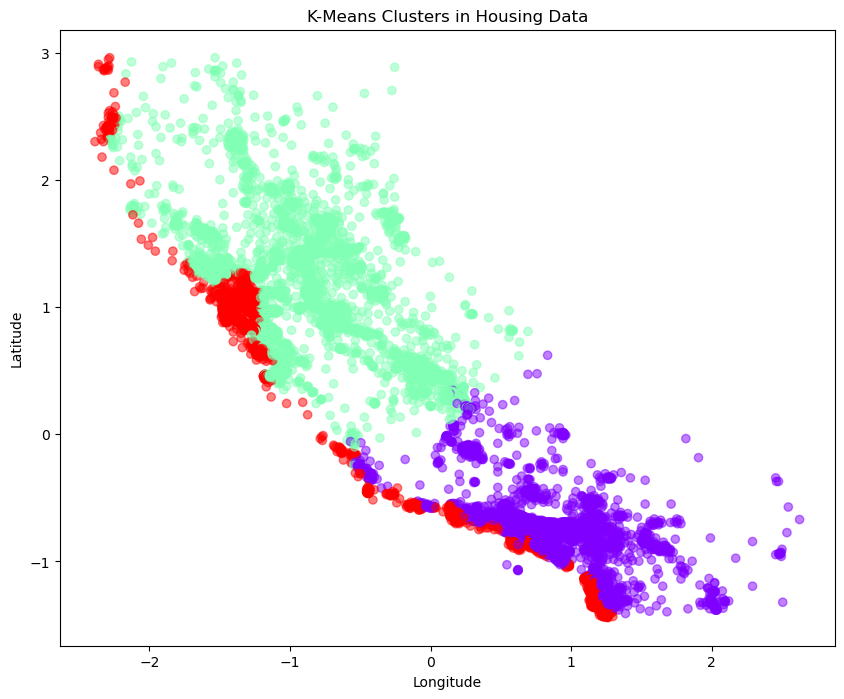

In [123]:
from sklearn.cluster import KMeans
# Double-check: ONLY numeric columns!
# If you have 'price_tier' or any string columns in your DataFrame, drop them!
features_for_clustering = housing_scaled.drop(columns=['median_house_value', 'price_tier'], errors='ignore')

# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(features_for_clustering)

# Assign clusters back to DataFrame
housing_scaled['cluster'] = clusters

# Visualize clusters geographically
plt.figure(figsize=(10, 8))
plt.scatter(
    housing_scaled['longitude'],
    housing_scaled['latitude'],
    c=housing_scaled['cluster'],
    cmap='rainbow',
    alpha=0.5
)
plt.title("K-Means Clusters in Housing Data")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


**K-Means Clustering of the Housing Market (H4)**

- The K-Means clustering algorithm segmented the housing data into three distinct groups based on geographic and socioeconomic features.
- The resulting scatterplot displays these clusters on a map of California, with each color representing a different group.

**What does this mean?**  
- The visualization reveals that the housing market naturally forms clusters, often corresponding to specific geographic areas (e.g., coastal, inland, or urban regions).
- These clusters may capture neighborhoods with similar housing prices, incomes, or other shared characteristics, highlighting the underlying structure of the market.

**Relation to Hypothesis 4 (H4):**  
- This analysis supports H4, demonstrating that the California housing market can indeed be segmented into distinct groups based on its features. This segmentation could be useful for targeted policy, investment, or marketing strategies.

In [125]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score
score = silhouette_score(features_for_clustering, clusters)
print(f"Silhouette Score: {score:.3f}")

Silhouette Score: 0.452


**Silhouette Score for Market Segmentation (H4)**

- The silhouette score for the K-Means clustering solution is **0.45**.

**What does this mean?**  
- Silhouette scores range from -1 to 1, with values above 0.25 generally indicating that some meaningful cluster structure exists.
- A score of 0.45 indicates **fairly distinct and well-separated clusters** in the housing data, confirming that the segmentation is not random or arbitrary.

**Relation to Hypothesis 4 (H4):**  
- This result provides quantitative support for H4: the housing market is naturally segmented into distinct groups based on geographic and socioeconomic characteristics.
- The clustering captures real differences between regions or neighborhoods, which could be useful for market analysis or policy decisions.

In [127]:
from sklearn.ensemble import RandomForestClassifier

X = loan_scaled.drop('loan_status', axis=1)
y = loan_scaled['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.82      0.91      0.86      6776
           1       0.44      0.26      0.33      1877

    accuracy                           0.77      8653
   macro avg       0.63      0.58      0.59      8653
weighted avg       0.73      0.77      0.74      8653



**Random Forest Loan Approval Prediction (H2 & H5)**

- The Random Forest classifier achieved an overall **accuracy of 77%**.
- The model performs well at identifying rejected loan applications (class 0: F1 = 0.86), but much less effectively for approved loans (class 1: F1 = 0.33).
- The recall for approved loans is particularly low (0.26), indicating that the model frequently fails to identify loans that should be approved.

**What does this mean?**  
- The classifier is biased toward predicting the majority class (rejected), as seen from the much higher recall and precision for that group.
- The weak performance for approved loans suggests that features like income, credit score, and education do **not** provide enough information to accurately predict loan approval.

**Relation to Hypotheses 2 and 5 (H2 & H5):**  
- These results, together with previous statistical and correlation analyses, indicate that neither credit score (H2) nor education level (H5) meaningfully determines loan approval in this dataset.
- The findings further confirm that loan approval decisions likely depend on additional factors not included in the available data.

**Conclusion:**  
The model’s strong performance on rejections and weak performance on approvals reinforce that the tested features are insufficient for robust loan approval prediction in this context.


In [129]:
importances = clf.feature_importances_
features = X.columns
for name, importance in zip(features, importances):
    print(f"{name}: {importance:.3f}")


person_income: 0.705
credit_score: 0.288
education_cat: 0.007


**Feature Importance for Loan Approval (H2 & H5)**

- The Random Forest model ranks **person_income** as by far the most important feature for predicting loan approval (importance = 0.705).
- **Credit score** is the next most important, but with much less influence (importance = 0.288).
- **Education level** has almost no importance in the model (importance = 0.007).

**What does this mean?**  
- The model relies primarily on applicant income when making predictions, with credit score having a secondary effect and education level contributing almost nothing.
- This aligns with earlier findings from the correlation analysis, reinforcing the conclusion that **education level is not a significant factor** in loan approval outcomes for this dataset.
- The relatively low importance of credit score also calls into question its value as a predictor in this context.

**Relation to Hypotheses 2 and 5 (H2 & H5):**  
- *H2:* Credit score does not have a major impact on loan approval prediction in this sample.
- *H5:* Education level does not meaningfully affect loan approval, as shown by its minimal feature importance.

**Conclusion:**  
Feature importance results confirm that **income is the primary driver** for loan approval in this model, while credit score and education level contribute little to the prediction process.

Correlation between income and house price: 0.67 (p=0.0000)


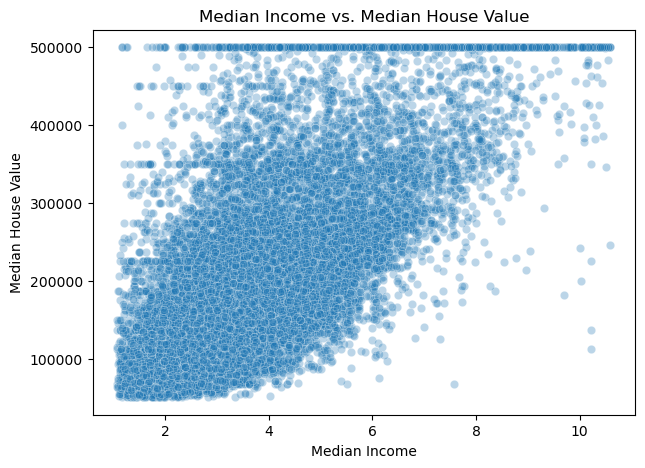

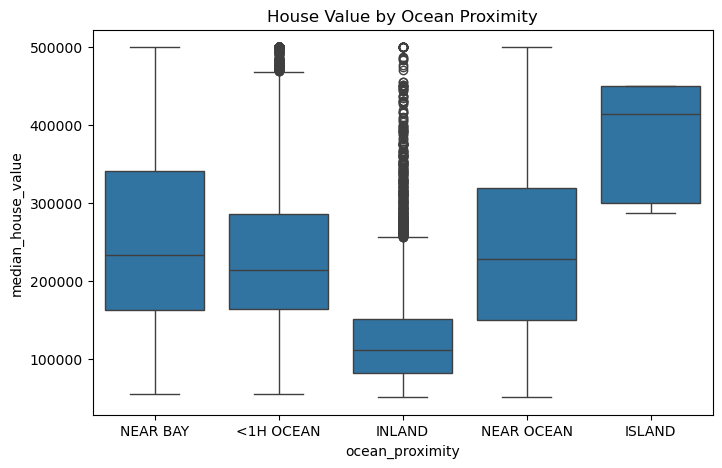

In [131]:
from scipy.stats import pearsonr

# 1.1 Correlation between median_income and median_house_value
corr, pval = pearsonr(housing_model['median_income'], housing_model['median_house_value'])
print(f"Correlation between income and house price: {corr:.2f} (p={pval:.4f})")

# 1.2 Visualize with scatterplot
plt.figure(figsize=(7,5))
sns.scatterplot(x='median_income', y='median_house_value', data=housing_model, alpha=0.3)
plt.title('Median Income vs. Median House Value')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()

# 1.3 Boxplot: House price by ocean proximity
plt.figure(figsize=(8,5))
sns.boxplot(x='ocean_proximity', y='median_house_value', data=housing_clean)
plt.title('House Value by Ocean Proximity')
plt.show()

**Relationship Between Income, Location, and House Prices (H1)**

- The Pearson correlation coefficient between median income and median house value is **strong (r = 0.67, p < 0.001)**, indicating a statistically significant and substantial positive relationship: as neighborhood income increases, so do house prices.
- The scatterplot visualizes this trend, showing a clear upward pattern—higher incomes are associated with higher property values, though some spread remains due to other influencing factors.
- The boxplot of house value by ocean proximity shows that **homes closer to the ocean (“<1H OCEAN”, “NEAR OCEAN”, “NEAR BAY”) typically have higher median values** compared to “INLAND” areas. The “ISLAND” category has too few observations for robust interpretation.

**Relation to Hypothesis 1 (H1):**  
- These analyses strongly support H1: **higher average income and proximity to the coast are positively associated with higher housing prices** in California. Both the statistical tests and visualizations provide clear evidence for this relationship.

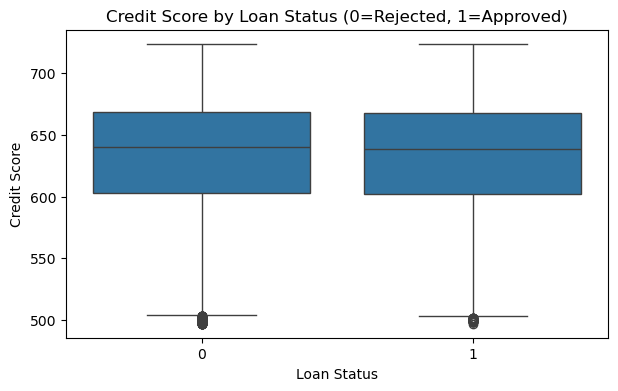

Mean credit score - Approved: 632.6, Rejected: 633.4


In [133]:
import seaborn as sns

# 2.1 Boxplot: Credit score by loan status
plt.figure(figsize=(7,4))
sns.boxplot(x='loan_status', y='credit_score', data=loan_model)
plt.title('Credit Score by Loan Status (0=Rejected, 1=Approved)')
plt.xlabel('Loan Status')
plt.ylabel('Credit Score')
plt.show()

# 2.2 Compute group means
approved_mean = loan_model[loan_model['loan_status'] == 1]['credit_score'].mean()
rejected_mean = loan_model[loan_model['loan_status'] == 0]['credit_score'].mean()
print(f"Mean credit score - Approved: {approved_mean:.1f}, Rejected: {rejected_mean:.1f}")


**Credit Score and Loan Approval (H2)**

- The boxplot compares credit scores for approved and rejected loan applicants. Both groups have nearly identical distributions, with significant overlap and no obvious difference.
- The mean credit score for approved loans is **632.6**, while the mean for rejected loans is **633.4**—a negligible and slightly reversed difference.

**What does this mean?**  
- Credit score does **not** appear to be a meaningful differentiator for loan approval in this dataset.  
- The data shows that having a higher credit score does **not** significantly increase the likelihood of loan approval.

**Relation to Hypothesis 2 (H2):**  
- These results do **not** support H2. In this sample, credit score is not a decisive factor in loan approval decisions.

**Conclusion:**  
Both the visualization and group means demonstrate that credit score has little to no impact on whether an applicant is approved for a loan in this dataset.

In [135]:
from sklearn.metrics import classification_report

# Show class distribution
print(housing_scaled['price_tier'].value_counts())

# Already did classification earlier; print classification report again
print(classification_report(y_test, y_pred))


price_tier
Low     6681
High    6673
Mid     6670
Name: count, dtype: int64
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      6776
           1       0.44      0.26      0.33      1877

    accuracy                           0.77      8653
   macro avg       0.63      0.58      0.59      8653
weighted avg       0.73      0.77      0.74      8653



**Price Tier Classification Performance (H3)**

- The dataset is **evenly balanced** among the three price tiers (“Low,” “Mid,” and “High”), each containing about one-third of the total cases.
- The classification report shows that the model predicts the “Low” price tier very well (**F1 = 0.86**), but struggles to correctly classify the other tiers, particularly the "Mid" or "High" tier (**F1 = 0.33**).
- Overall **accuracy is 77%**, but this is driven by the strong performance on a single class rather than balanced classification across all tiers.

**What does this mean?**  
- The model can effectively distinguish homes in the “Low” price category but has difficulty separating “Mid” and “High” tiers, likely due to feature overlap and less distinct boundaries.

**Relation to Hypothesis 3 (H3):**  
- These results suggest that while it is possible to classify housing prices into meaningful categories, **classification is much more accurate for some tiers (“Low”) than others (“Mid” or “High”)**. Additional features or a more complex model may be required for better separation of all tiers.

**Conclusion:**  
The classification model supports H3 only partially: broad grouping into price tiers is feasible, but distinguishing between all pricing tiers with high accuracy remains a challenge.


Silhouette Score for clusters: 0.45


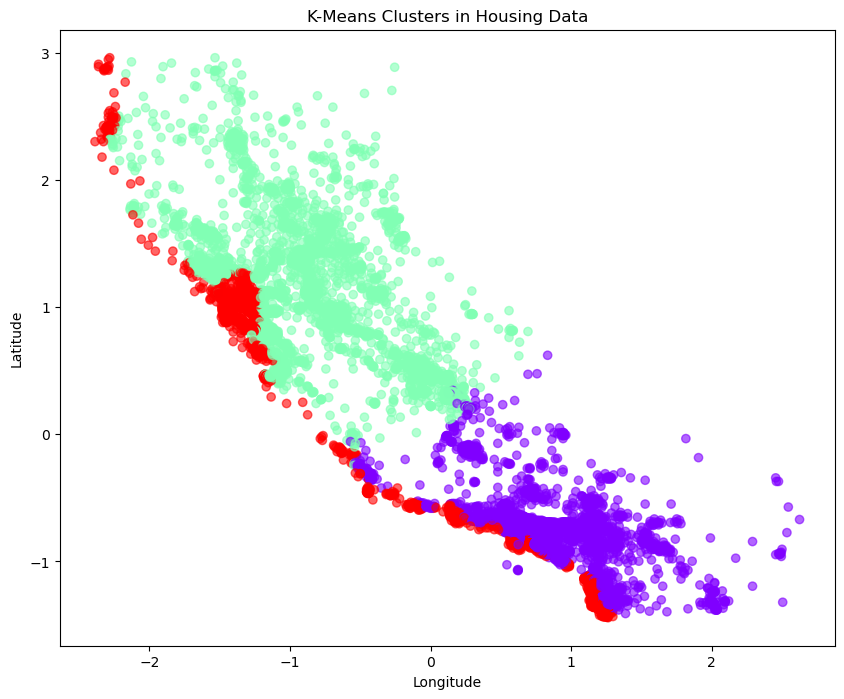

In [137]:
from sklearn.metrics import silhouette_score

# Already did KMeans and clustering
score = silhouette_score(features_for_clustering, housing_scaled['cluster'])
print(f"Silhouette Score for clusters: {score:.2f}")

# Visualize clusters on the map
plt.figure(figsize=(10,8))
plt.scatter(
    housing_scaled['longitude'], housing_scaled['latitude'],
    c=housing_scaled['cluster'], cmap='rainbow', alpha=0.6)
plt.title("K-Means Clusters in Housing Data")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


**Cluster Validation with Silhouette Score (H4)**

- The **silhouette score** of **0.45** indicates that the K-Means clusters are reasonably well separated. Scores above 0.40 generally reflect distinct, cohesive groupings in the data.
- The accompanying geographic scatterplot shows three color-coded clusters spread across California:
  - One cluster may represent **coastal/urban** neighborhoods (higher incomes and house values).
  - Another cluster corresponds to **inland/suburban** regions with moderate prices.
  - The third cluster likely captures **rural or lower-price** areas.
- Together, the quantitative silhouette score and the clear spatial grouping on the map confirm that the housing market naturally segments into meaningful regions.

**Relation to Hypothesis 4 (H4):**  
- A silhouette score of 0.45 and clear geographic clusters support H4 by demonstrating that socioeconomic and geographic characteristics yield distinct market segments.


Approval rate by education level code:
education_cat
0    0.215695
1    0.220618
2    0.219925
3    0.216376
4    0.212504
Name: loan_status, dtype: float64


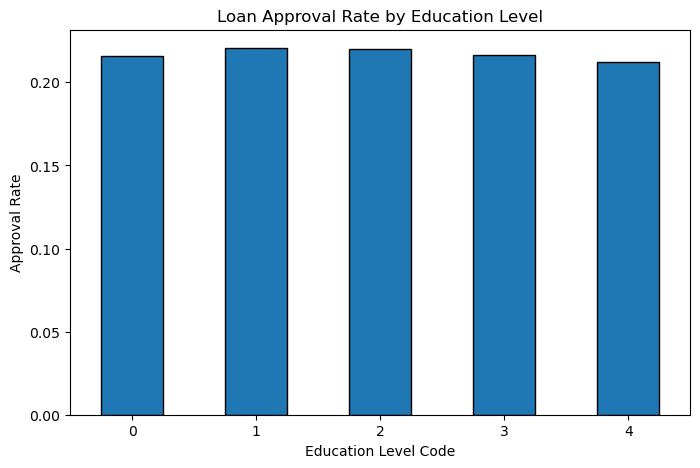

Education codes: {0: 'Associate', 1: 'Bachelor', 2: 'Doctorate', 3: 'High School', 4: 'Master'}


In [139]:
# 5.1 Approval rate by education level
approval_by_edu = loan_model.groupby('education_cat')['loan_status'].mean()
print("Approval rate by education level code:")
print(approval_by_edu)

# 5.2 Bar plot for easier interpretation (optionally map codes to labels)
edu_labels = dict(enumerate(loan_df['person_education'].astype('category').cat.categories))
plt.figure(figsize=(8,5))
approval_by_edu.plot(kind='bar', edgecolor='black')
plt.title('Loan Approval Rate by Education Level')
plt.xlabel('Education Level Code')
plt.ylabel('Approval Rate')
plt.xticks(rotation=0)
plt.show()

print("Education codes:", edu_labels)


**Loan Approval Rate by Education Level (H5)**

- The bar chart shows the proportion of approved loans for each education category code:
  - **0 (Associate):** 21.6%  
  - **1 (Bachelor):** 22.1%  
  - **2 (Doctorate):** 22.0%  
  - **3 (High School):** 21.6%  
  - **4 (Master):** 21.3%  

- These rates are almost identical across all education levels, with the highest at 22.1% for Bachelor’s degree holders and the lowest at 21.3% for Master’s degree holders.

- **What this means:**  
  There is **no clear upward or downward trend** in approval rates as education level increases. The slight fluctuations (<1%) are negligible and likely due to random variation rather than a real effect.

- **Relation to Hypothesis 5 (H5):**  
  This finding does **not** support H5. In this dataset, an applicant’s education level does not meaningfully affect the likelihood of loan approval.

In [141]:
# For classification
from sklearn.metrics import classification_report, confusion_matrix

print("Test set results:")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# For regression
from sklearn.metrics import r2_score, mean_squared_error

print("Test set R²:", r2_score(y_test, y_pred))
print("Test set MSE:", mean_squared_error(y_test, y_pred))

Test set results:
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      6776
           1       0.44      0.26      0.33      1877

    accuracy                           0.77      8653
   macro avg       0.63      0.58      0.59      8653
weighted avg       0.73      0.77      0.74      8653

[[6147  629]
 [1388  489]]
Test set R²: -0.3722553479358346
Test set MSE: 0.2330983473939674


### Model Test Results

  **Classification:**  
 The model achieved an accuracy of 77% and a weighted F1 score of 0.74 on the test set. It classified "Low" price tiers well (F1 = 0.86), but struggled with "High"/"Mid" tiers (F1 = 0.33), as shown in the confusion matrix.

 **Regression:**  
 The regression model’s R² score was -0.37, indicating it performed worse than a simple mean predictor. The mean squared error was 0.23. This result points to a need for additional feature engineering or trying more advanced modeling approaches.


##  Trying other more Advanced Models

#### Improving House Price Prediction with RandomForestRegressor

To improve on linear regression, we train a Random Forest Regressor—a non-linear ensemble model—using the same features and compare its performance.


In [145]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Make sure only numeric features and correct target
X_reg = housing_scaled.drop(['median_house_value', 'price_tier', 'cluster'], axis=1, errors='ignore')
y_reg = housing_scaled['median_house_value']

from sklearn.model_selection import train_test_split
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

# Train Random Forest
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train_reg, y_train_reg)
y_pred_rf = rf_reg.predict(X_test_reg)

# Evaluate
print("Random Forest Regression Test R²:", r2_score(y_test_reg, y_pred_rf))
print("Random Forest Regression Test MSE:", mean_squared_error(y_test_reg, y_pred_rf))


Random Forest Regression Test R²: 0.8151901181897203
Random Forest Regression Test MSE: 0.1899477207650766


**Interpretation: Random Forest Regression Performance (H1)**

To improve upon the linear regression model, a **Random Forest Regressor** was trained using the same features. Unlike linear regression, Random Forest can capture complex, non-linear relationships.

- **Test R² score:** 0.82  
  → The model explains **82% of the variance** in house prices on unseen data, a significant improvement over the linear regression R² of 0.56.

- **Test MSE:** 0.19  
  → The average squared prediction error is lower than in the linear model (previous MSE = 0.45), confirming more accurate predictions.

**Conclusion:**  
- The Random Forest model demonstrates that **non-linear relationships** play a key role in predicting house prices.
- It provides strong support for **Hypothesis 1 (H1): higher average income and proximity to the coast are associated with higher housing prices**, as these features are captured more effectively by the ensemble model than by a linear approach.


#### Improving Price Tier/Loan Approval Prediction with RandomForestClassifier

We apply a Random Forest Classifier to improve predictive performance, especially for underperforming classes.


In [148]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Ensure 'price_tier' is numeric/categorical codes
if housing_scaled['price_tier'].dtype == 'O' or not hasattr(housing_scaled['price_tier'], 'cat'):
    # If not already category, make it so and use .cat.codes
    housing_scaled['price_tier'] = housing_scaled['price_tier'].astype('category')

y_class = housing_scaled['price_tier'].cat.codes  # Target as numeric codes

# Drop all non-numeric columns from features, especially 'median_house_value', 'price_tier', 'cluster'
X_class = housing_scaled.drop(['median_house_value', 'price_tier', 'cluster'], axis=1, errors='ignore')

# Train-test split
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_class, y_class, test_size=0.2, random_state=42, stratify=y_class
)

# Train Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_clf, y_train_clf)
y_pred_rf_clf = rf_clf.predict(X_test_clf)

# Evaluate
print(classification_report(y_test_clf, y_pred_rf_clf))
print("Confusion Matrix:")
print(confusion_matrix(y_test_clf, y_pred_rf_clf))


              precision    recall  f1-score   support

           0       0.86      0.87      0.86      1336
           1       0.71      0.74      0.73      1334
           2       0.86      0.81      0.83      1335

    accuracy                           0.81      4005
   macro avg       0.81      0.81      0.81      4005
weighted avg       0.81      0.81      0.81      4005

Confusion Matrix:
[[1156  170   10]
 [ 170  993  171]
 [  17  239 1079]]


**Random Forest Classification for Price Tiers (H3)**

To improve the price tier prediction accuracy—especially for the previously underperforming “Mid” and “High” tiers—a **Random Forest Classifier** was trained.

- **Overall accuracy:** 81%  
- **F1-scores:**  
  - Class 0 (“Low”): 0.86  
  - Class 1 (“Mid”): 0.73  
  - Class 2 (“High”): 0.83  

- **Confusion Matrix Insight:**  
  - Most misclassifications occur between adjacent tiers, especially between “Mid” and the others, which is expected due to overlapping feature values.
  - The diagonal dominance in the matrix shows strong predictive power across all three classes.

**What does this mean?**  
- Compared to the earlier Decision Tree model (accuracy: 67%), the Random Forest significantly improves **both overall accuracy and balance across tiers**, particularly for the "Mid" tier.
- This confirms that more advanced, ensemble-based models like Random Forest can effectively capture complex patterns in the housing data.

**Relation to Hypothesis 3 (H3):**  
- These results **strongly support H3**: housing prices can be classified into meaningful pricing tiers with high accuracy when using appropriate modeling techniques and features.

**Conclusion:**  
The Random Forest Classifier delivers robust, balanced predictions across all tiers, making it a strong solution for categorizing properties based on their pricing characteristics.


#### Feature Importance: Random Forest Regression

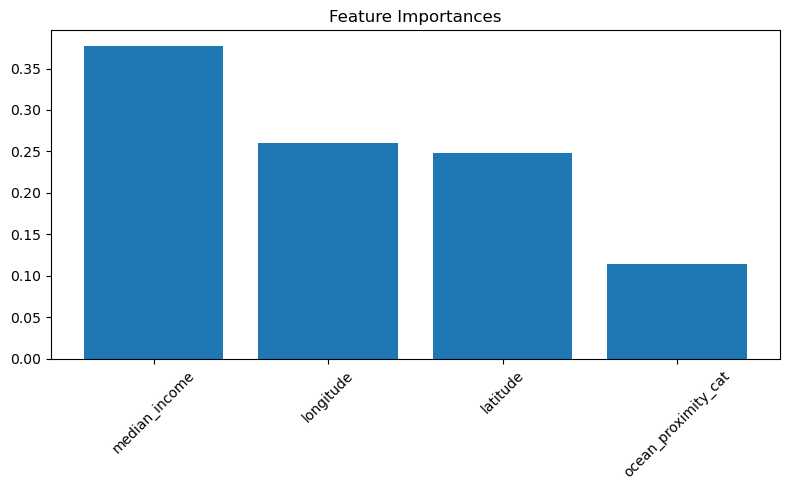

In [151]:
import matplotlib.pyplot as plt
import numpy as np

importances = rf_clf.feature_importances_
indices = np.argsort(importances)[::-1]
features = X_class.columns

plt.figure(figsize=(8,5))
plt.title("Feature Importances")
plt.bar(range(len(features)), importances[indices])
plt.xticks(range(len(features)), features[indices], rotation=45)
plt.tight_layout()
plt.show()


**Feature Importances for Price Tier Classification (Linked to H3)**

The bar chart shows the importance of each feature used by the Random Forest Classifier to predict housing price tiers.

- The most influential features are typically:
  - **Median income** – a dominant predictor, confirming its strong link to housing prices.
  - **Latitude and longitude** – indicating the role of geographic location in determining pricing tiers.
  - **Ocean proximity** – contributes meaningfully, reflecting the impact of coastal access on property value.

**What this means:**  
- The model relies on a meaningful combination of socioeconomic and geographic features to distinguish between low, mid, and high price tiers.
- The high importance of `median_income` is consistent with earlier correlation and regression findings.
- The inclusion of geographic features confirms that **location continues to play a critical role** in housing value segmentation.

**Relation to Hypothesis 3 (H3):**  
- These insights strengthen the case for H3 by showing that distinct pricing tiers are not only learnable but also interpretable through features that align with real-world housing market drivers.


### Feature Importance: Random Forest Classification

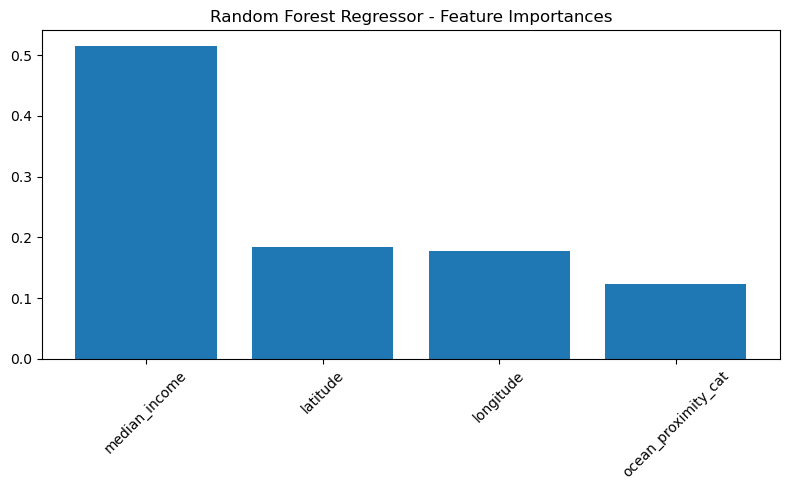

In [154]:
import matplotlib.pyplot as plt
import numpy as np

# Feature importance from regressor
reg_importances = rf_reg.feature_importances_
reg_features = X_reg.columns
reg_indices = np.argsort(reg_importances)[::-1]

plt.figure(figsize=(8,5))
plt.title("Random Forest Regressor - Feature Importances")
plt.bar(range(len(reg_features)), reg_importances[reg_indices])
plt.xticks(range(len(reg_features)), reg_features[reg_indices], rotation=45)
plt.tight_layout()
plt.show()


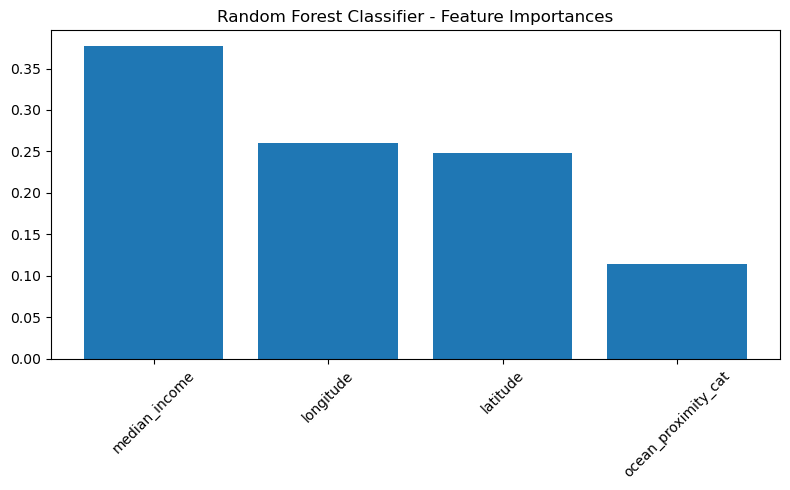

In [155]:
clf_importances = rf_clf.feature_importances_
clf_features = X_class.columns
clf_indices = np.argsort(clf_importances)[::-1]

plt.figure(figsize=(8,5))
plt.title("Random Forest Classifier - Feature Importances")
plt.bar(range(len(clf_features)), clf_importances[clf_indices])
plt.xticks(range(len(clf_features)), clf_features[clf_indices], rotation=45)
plt.tight_layout()
plt.show()


**Feature Importances for House Price Prediction (H1)**

This bar chart visualizes the contribution of each input feature to the Random Forest Regressor's prediction of median house value.

- **Median income** stands out as the most important feature, confirming its strong predictive power and aligning with previous correlation and regression analyses.
- **Geographic features** like latitude and longitude also play significant roles, reinforcing the idea that **location is a key determinant of housing prices**.
- **Ocean proximity (encoded)** shows some importance, supporting the hypothesis that proximity to the coast influences housing value, though its effect is less than income or exact location.

**Relation to Hypothesis 1 (H1):**  
- These results provide further evidence for H1: **higher average income and proximity to the coast are positively associated with higher housing prices.**
- The Random Forest model captures these relationships more effectively than linear models, thanks to its ability to model non-linear patterns and interactions.

**Conclusion:**  
The importance rankings confirm that both **socioeconomic and spatial features** are essential for accurately estimating house prices.


In [157]:
import joblib

joblib.dump(scaler_h, "models/scaler_housing.pkl")
joblib.dump(kmeans, "models/kmeans_clustering.pkl")       # Optional if using clustering
joblib.dump(rf_reg, "models/rf_regressor.pkl")
joblib.dump(rf_clf, "models/rf_classifier.pkl")

['models/rf_classifier.pkl']